In [86]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)
df = pd.read_csv(r"Data\student-mat.csv", sep=";")
print(df.head()) # so we have  [5 rows x 33 columns]

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


## Preprocessing the Dataset

In [87]:
print(df.isnull().sum())

print(df.dtypes)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      obje

In [88]:
df = df.dropna()

so the data type in int and theres no null values in our dataset 


In [89]:
df = pd.get_dummies(df, drop_first=True)
print(df.head())

   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  famsup_yes  \
0     1  ...             True           False           True       False   
1     1  ...            False           False          False        True   
2     2  ...             True           False           True       False   
3     1  ...             True           False          False        True   
4     1  ...            False           False          False        True   

   paid_yes  activities_yes  nursery_yes  higher_yes  internet

###  Feature Scaling with StandardScaler

We standardize numerical features (`age`, `absences`, `G1`, `G2`) using `StandardScaler` from scikit-learn.  
This scales the data to have a mean of 0 and standard deviation of 1 — useful for improving model performance.

\[
x_{scaled} = \frac{x - \mu}{\sigma}
\]


In [90]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['age', 'absences', 'G1', 'G2']
df[num_cols] = scaler.fit_transform(df[num_cols])



## Exploratory Data Analysis "EDA" : 

In [91]:
#Summary Statistics 

In [92]:
print("\nSummary statistics for numerical features:")
display(df.describe())


Summary statistics for numerical features:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,3.950000e+02,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,3.950000e+02,3.950000e+02,3.950000e+02,395.000000
mean,1.223213e-15,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,-5.396527e-17,8.994212e-17,-4.946817e-17,10.415190
std,1.001268e+00,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,1.001268e+00,1.001268e+00,1.001268e+00,4.581443
min,-1.330954e+00,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-7.142362e-01,-2.385787e+00,-2.851920e+00,0.000000
25%,-5.462869e-01,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,-7.142362e-01,-8.774869e-01,-4.562264e-01,8.000000
50%,2.383798e-01,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,-2.137958e-01,2.749306e-02,7.615005e-02,11.000000
75%,1.023046e+00,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,2.866447e-01,6.308130e-01,6.085265e-01,14.000000
max,4.161713e+00,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,8.669022e+00,2.440773e+00,2.205656e+00,20.000000


In [93]:
#Correlation Analysis

In [94]:
correlation_matrix = df.corr(numeric_only=True)
print("\nCorrelation matrix:")
display(correlation_matrix)


Correlation matrix:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,...,-0.133558,0.398396,-0.251811,-0.140609,-0.035933,-0.103063,-0.086632,-0.209081,-0.112094,0.164669
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,...,0.112375,-0.118635,-0.036029,0.183727,0.159700,0.108277,0.193263,0.168845,0.201463,0.039681
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,...,-0.047265,-0.091250,0.037530,0.185496,0.086981,0.112643,0.157177,0.174566,0.127507,0.015602
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,...,-0.057669,0.048758,-0.009246,-0.003286,-0.066420,-0.007766,-0.033338,-0.083508,-0.111302,0.021962
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,...,-0.024031,0.031724,0.037763,0.145228,0.167220,0.089877,0.081325,0.175081,0.059422,0.053285
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,...,-0.134498,0.291157,-0.000437,-0.055075,-0.188039,-0.069341,-0.100734,-0.300316,-0.063451,0.093137
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,...,-0.010983,0.049548,-0.001345,-0.020436,0.000460,0.040687,-0.003581,0.024319,0.032768,-0.063816
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,...,-0.028979,0.069438,-0.045465,0.010538,-0.064253,0.089728,-0.024696,-0.061244,0.051286,-0.011182
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,...,0.080236,-0.012380,-0.037698,-0.015631,0.010493,0.046088,0.004612,-0.039700,0.074370,0.007870
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,...,-0.051224,0.037626,-0.021485,-0.031575,0.062465,-0.066508,-0.084849,-0.069828,0.036210,0.015121


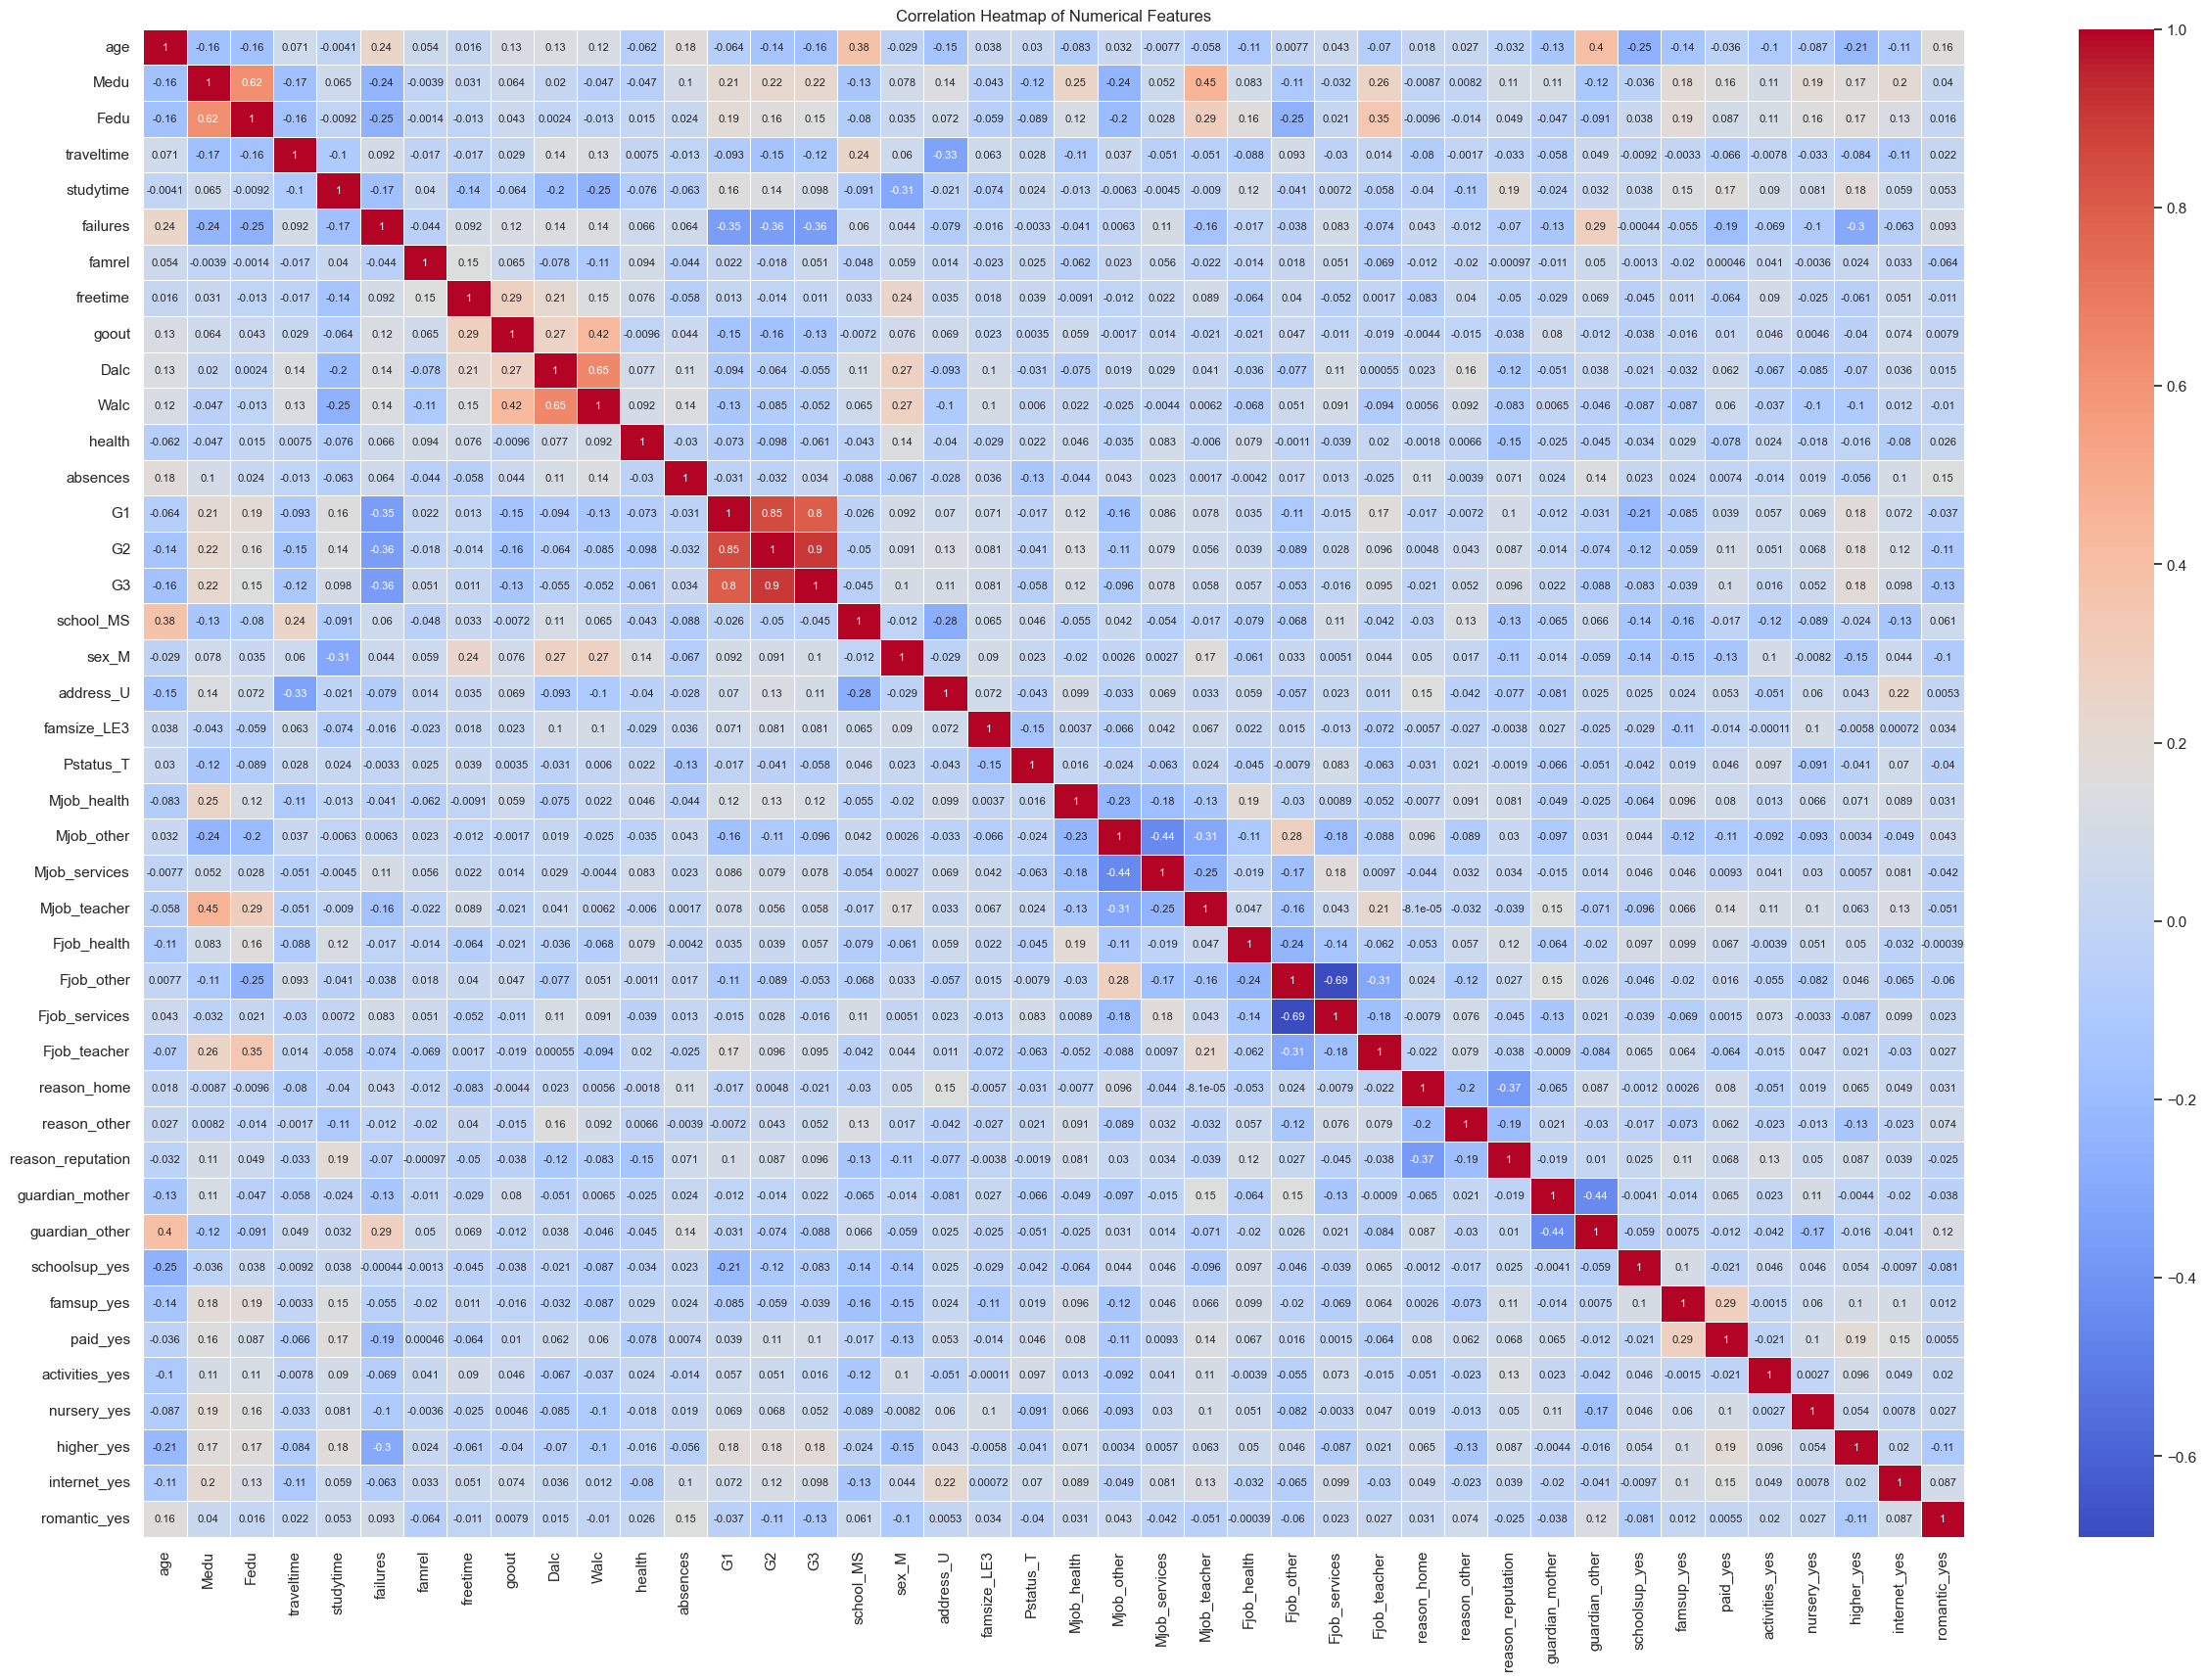

In [95]:

plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [96]:
#Feature Relationships with Final Grade (G3)

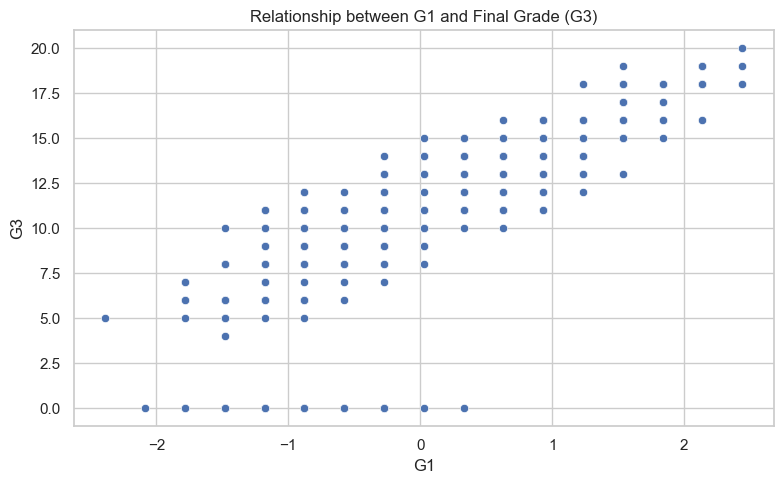

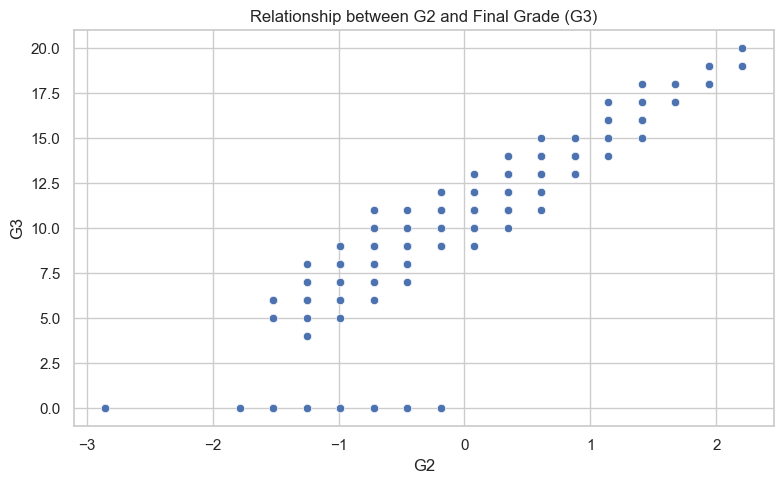

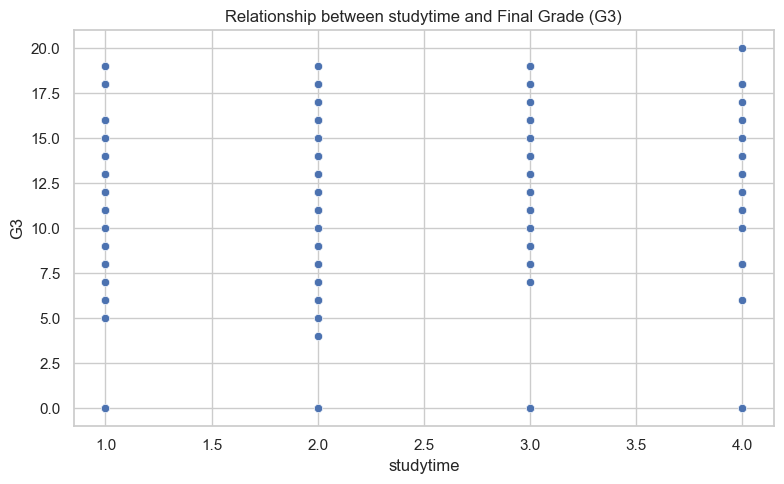

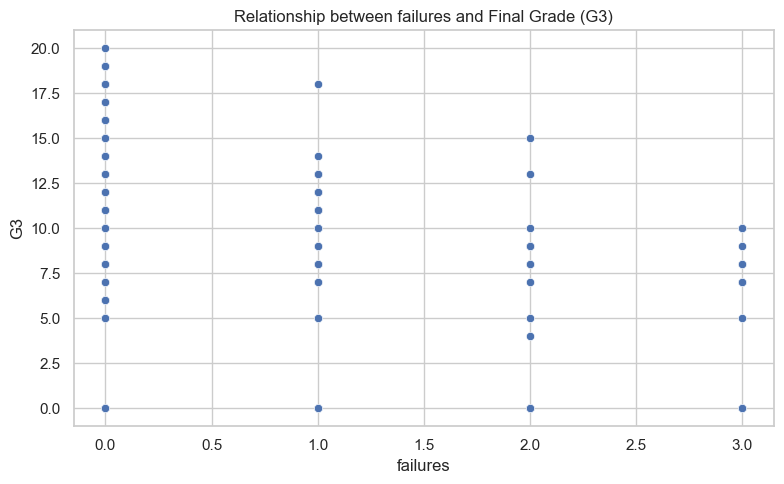

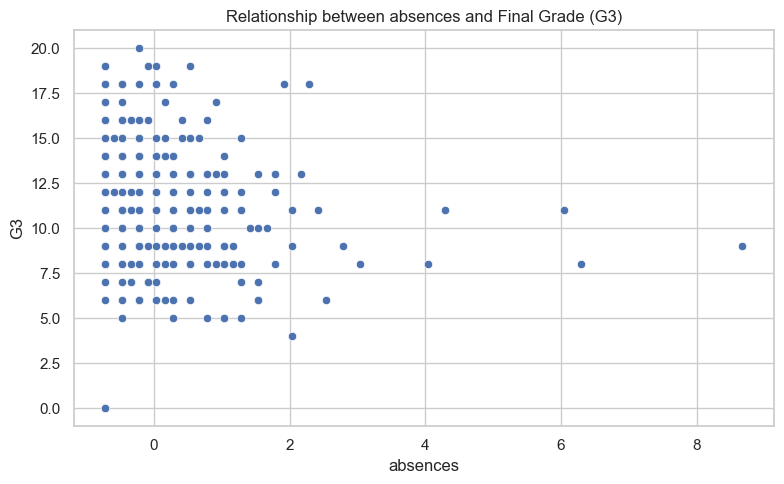

In [97]:
features_to_plot = ['G1', 'G2', 'studytime', 'failures', 'absences']
for feature in features_to_plot:
    plt.figure()
    sns.scatterplot(data=df, x=feature, y='G3')
    plt.title(f'Relationship between {feature} and Final Grade (G3)')
    plt.xlabel(feature)
    plt.ylabel('G3')
    plt.tight_layout()
    plt.show()

In [98]:
#Distribution of Final Grades (G3)

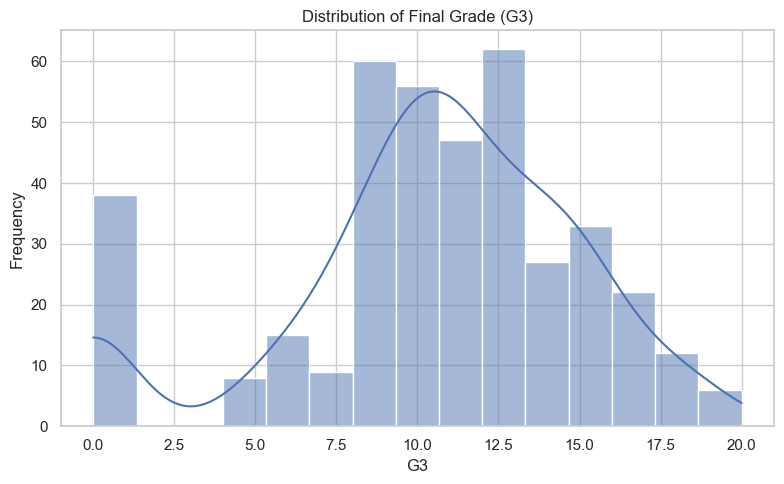

In [99]:
plt.figure()
sns.histplot(df['G3'], kde=True, bins=15)
plt.title("Distribution of Final Grade (G3)")
plt.xlabel("G3")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [100]:
print(df.columns)


Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')


In [101]:
x = df[['G1', 'G2', 'studytime', 'failures', 'absences' ]]
y = df['G3']


In [102]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## 1 - Support Vector Regression "SVR" Model :


splitting the data to input and output
splitting into data training set and testing set 

In [103]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

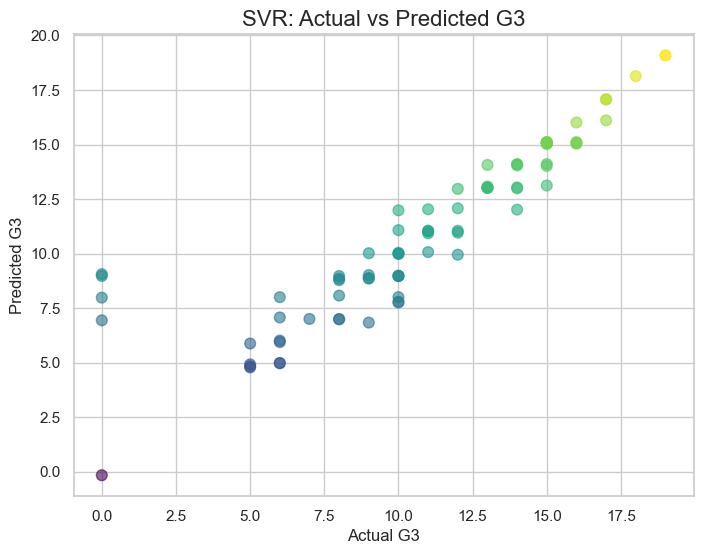

In [104]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, s=60, c=y_pred, cmap='viridis')


plt.title("SVR: Actual vs Predicted G3", fontsize=16)
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.grid(True)

plt.show()

In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

results_svr = {
    'RMSE': float(np.sqrt(mean_squared_error(y_test, y_pred))),
    'MAE':float(mean_absolute_error(y_test, y_pred)),
    'R²': float(r2_score(y_test, y_pred))
}

print( "SVR Evaluation Metrics :  \n", results_svr)


SVR Evaluation Metrics :  
 {'RMSE': 2.073301736454657, 'MAE': 1.0307193781727868, 'R²': 0.7903647802324072}


## 2- Linear Regression Model

In [106]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [107]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
results_lr = {
    'RMSE': float(np.sqrt(mean_squared_error(y_test, y_pred_lr))),
    'MAE': float(mean_absolute_error(y_test, y_pred_lr)),
    'R²': float(r2_score(y_test, y_pred_lr))
}
print("Linear Regression Results:\n", results_lr)

Linear Regression Results:
 {'RMSE': 2.113410327412924, 'MAE': 1.3394159082670936, 'R²': 0.7821754247320556}


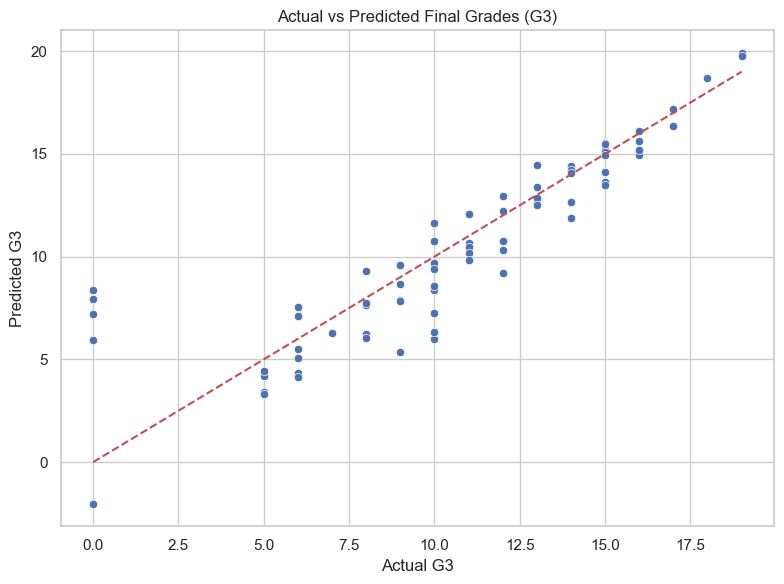

In [108]:
# Plot actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Actual vs Predicted Final Grades (G3)')
plt.grid(True)
plt.tight_layout()
plt.show()

## 3- Gradient Boosting Regression Model :

 Gradient Boosting Regression Evaluation Metrics (Test Set)
 {'RMSE': 1.7076576112955957, 'MAE': 1.0629818229706287, 'R²': 0.8577865010846757}


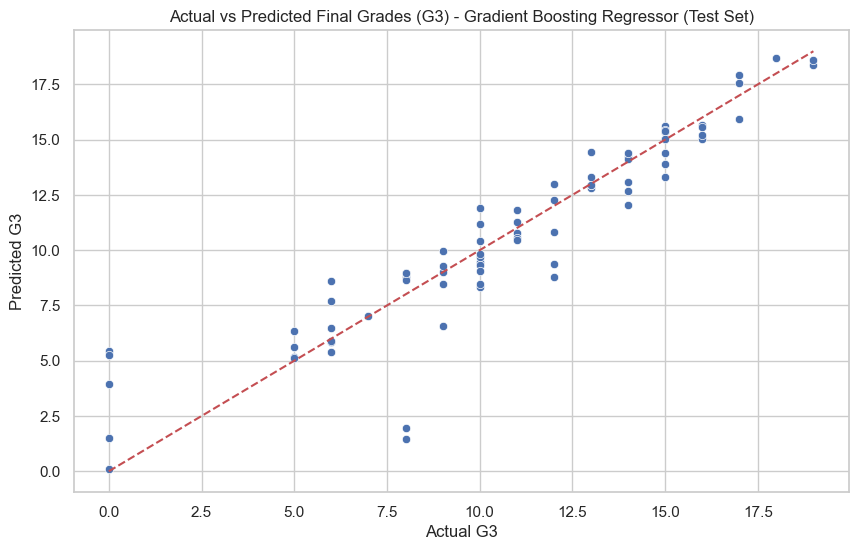

In [109]:
# Initialize and fit the model
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Predict on test data
y_pred = gbr.predict(X_test)

# Evaluate performance
results_GBR = {
    'RMSE': float(np.sqrt(mean_squared_error(y_test, y_pred))),
    'MAE':mean_absolute_error(y_test, y_pred),
    'R²': r2_score(y_test, y_pred)
}

# Print results
print(" Gradient Boosting Regression Evaluation Metrics (Test Set)\n" , results_GBR)

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs Predicted Final Grades (G3) - Gradient Boosting Regressor (Test Set)")
plt.grid(True)
plt.show()

## 4- Decision Tree Regression Model :

In [110]:
# Define the parameter grid hashmap key paramters that we call in the model and the values is the trilesin the model
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create the base model
decision_tree = DecisionTreeRegressor(random_state=42)

# Instantiate the grid search model to fined best paramter
grid_search = GridSearchCV(estimator=decision_tree, 
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation to try it on more parts ex: 5 parts
                           verbose=True) # 

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score (negative MSE): ", grid_search.best_score_)

# Get the best model
best_decision_tree = grid_search.best_estimator_

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters found:  {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}
Best score (negative MSE):  0.8126030202501593


Decision Tree Regression Evaluation Metrics (Test Set):
 {'RMSE': 2.141171457404499, 'MAE': 1.368426004671351, 'R²': 0.7764152820489394}


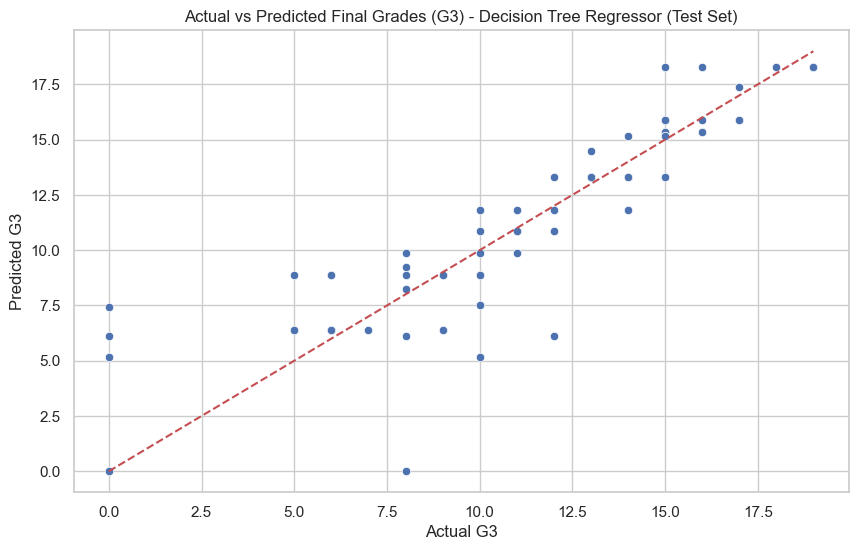

In [111]:

# Predict on test data
y_pred =grid_search.predict(X_test)

# Evaluate performance
results_DT = {
    'RMSE':  float(np.sqrt(mean_squared_error(y_test, y_pred))),
    'MAE': mean_absolute_error(y_test, y_pred),
    'R²': r2_score(y_test, y_pred)
}

# Print results
print("Decision Tree Regression Evaluation Metrics (Test Set):\n" , results_DT)

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs Predicted Final Grades (G3) - Decision Tree Regressor (Test Set)")
plt.grid(True)
plt.show()

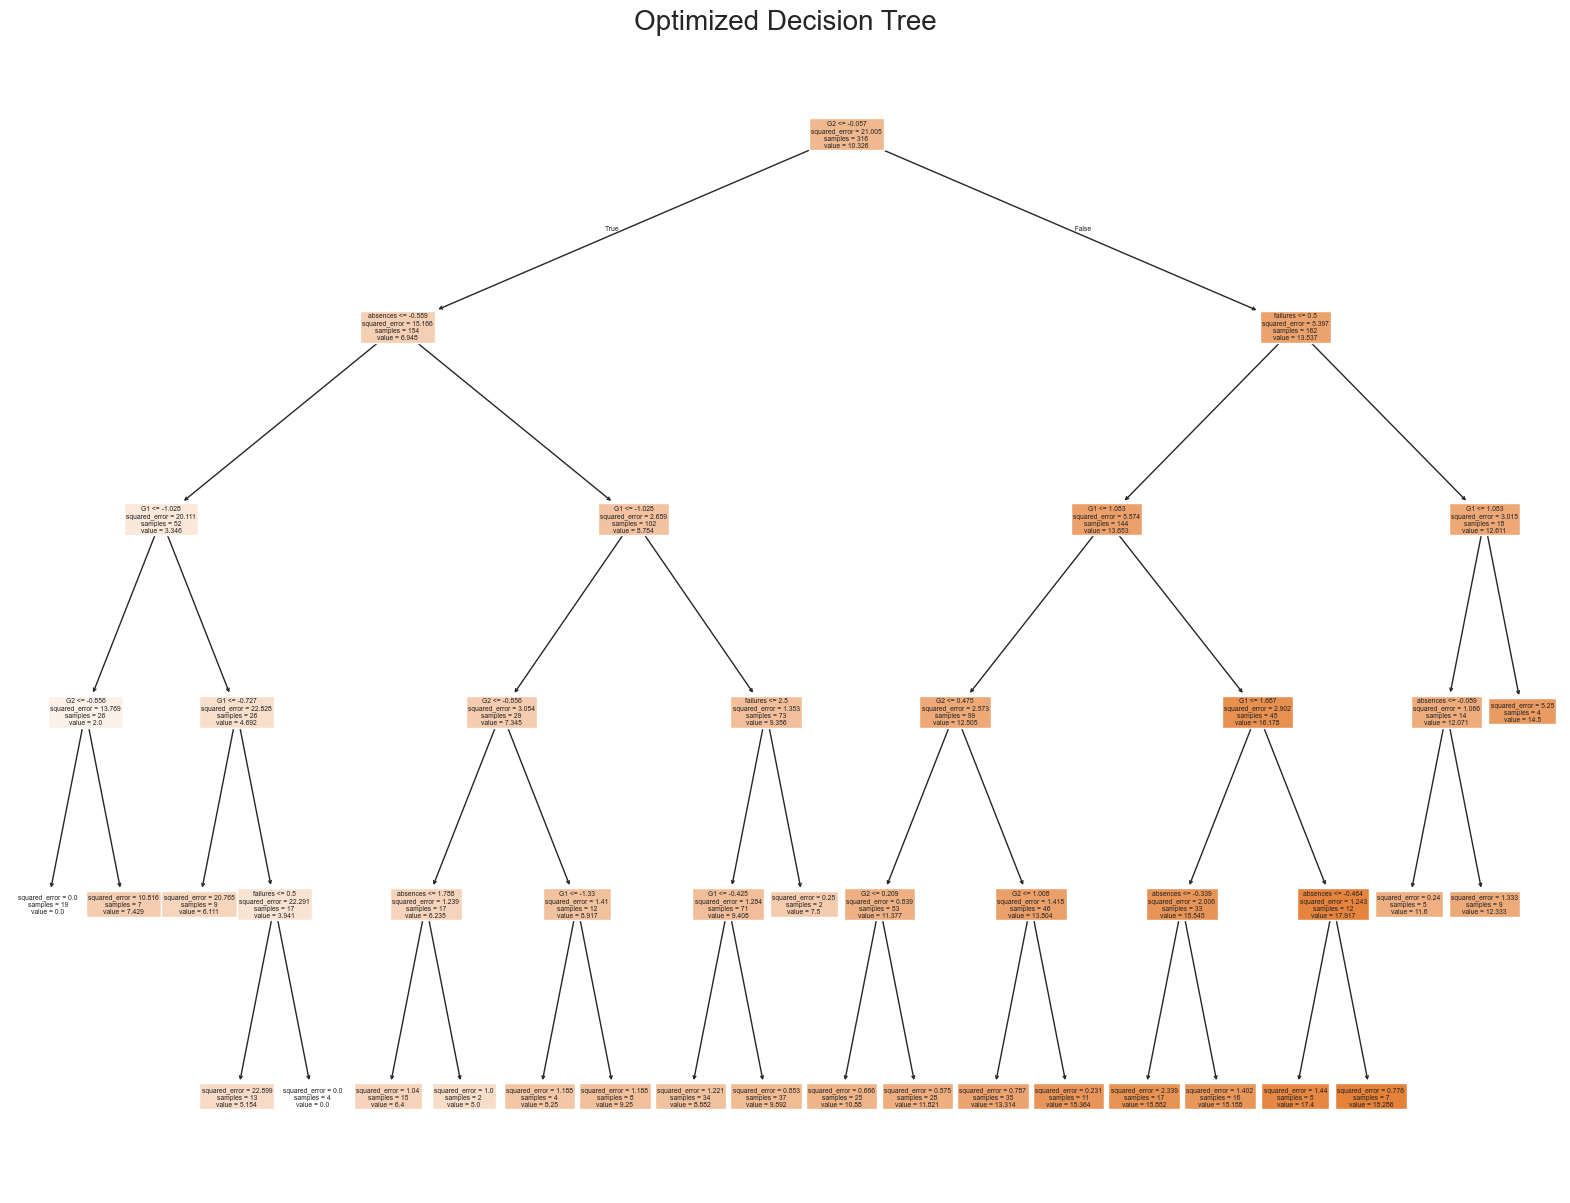

In [112]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the best decision tree
plt.figure(figsize=(20, 15))
plot_tree(best_decision_tree, 
          feature_names=X_train.columns if hasattr(X_train, 'columns') else [f'feature_{i}' for i in range(X_train.shape[1])], 
          filled=True)
plt.title("Optimized Decision Tree" , fontsize=20)
plt.show()


## which one is Best Model ?

#### we choose the  model with the lowest RMSE 

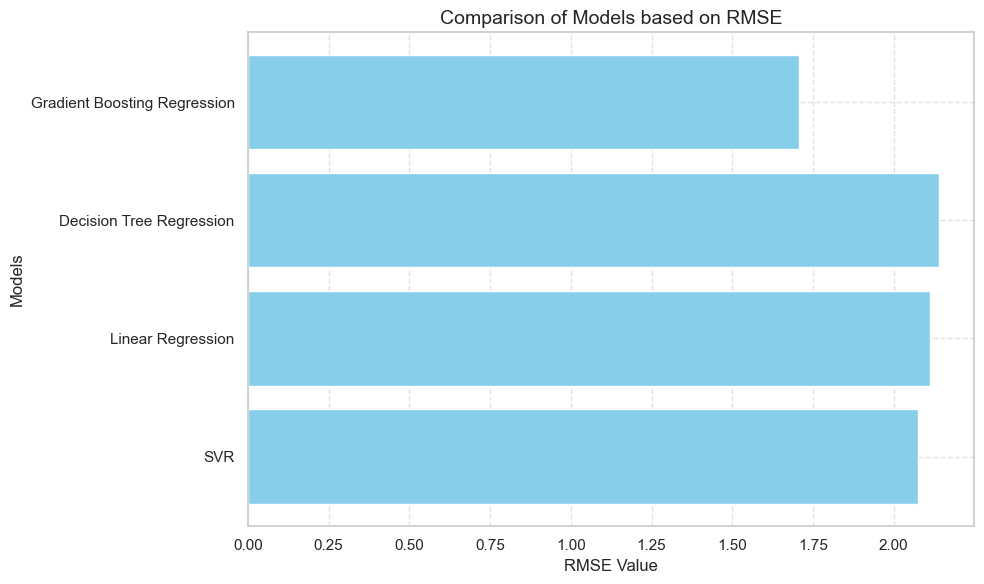

In [113]:
# Metrics dictionary to store the results for easy comparison
models = {
    "SVR": results_svr,
    "Linear Regression": results_lr,
    "Decision Tree Regression": results_DT,
    "Gradient Boosting Regression": results_GBR
}

metric_to_plot = 'RMSE' # we can do it for R² the higher is better too

# Extracting the values for the chosen metric from each model
metric_values = {model: metrics[metric_to_plot] for model, metrics in models.items()}

# Plotting the bar chart for the selected metric
plt.figure(figsize=(10, 6))
plt.barh(list(metric_values.keys()), list(metric_values.values()), color='skyblue')
plt.xlabel(f"{metric_to_plot} Value", fontsize=12)
plt.ylabel("Models", fontsize=12)
plt.title(f"Comparison of Models based on {metric_to_plot}", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Best Model Based On Less RMSE Value Is Gradient Boosting Regression